In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger, Kruteesh Desai
# A basic example how to use the package

In [2]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
import pickle

In [3]:
shower = Atm_Shower()

In [4]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [5]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)
#config['atmospheric showers']['particles of interest']=['nue']
config['general']['detector'] = 'POne'
config["general"]["year"] = 7


In [6]:
pdm = PDM()

POne


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:280: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:279: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
  0%|          | 0/3 [00:00<?, ?it/s]/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/limit_calc.py:125: RuntimeWarning: invalid value encountered in true_divide
  np.nan_to_num(x**2 /
100%|██████████| 3/3 [00:00<00:00, 29.36it/s]


In [7]:
e_grid = pdm._shower_sim.egrid
eff_po_1 = pdm._aeff.spl_A15(pdm._shower_sim.egrid)
eff_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/27_11/data/eff_area_ice.pkl','rb'))

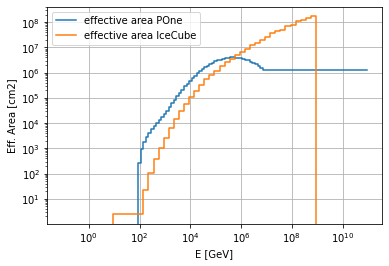

In [8]:
plt.step(pdm._shower_sim.egrid, eff_po_1, label='effective area POne')
plt.step(pdm._shower_sim.egrid, eff_ice[0], label='effective area IceCube')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('E [GeV]')
plt.ylabel('Eff. Area [cm2]')
plt.legend()


In [9]:
back_po=pickle.load(open('../data/background_pone.pkl','rb'))
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/09_12/data/background_ice.pkl','rb'))

In [10]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
mass_id = 5

sv_id = -1

mass_grid[mass_id], sv_grid[sv_id]
# The limit calculation


(31622.776601683792, 1e-21)

In [11]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
dphi_ice[dphi_ice[:,0].sort()]

array([[[2.12522998e+02, 1.63541848e-04],
        [3.75355026e+02, 1.17293567e-04],
        [6.29536175e+02, 4.82400307e-05],
        [1.29846584e+03, 2.68117327e-05],
        [2.54321174e+03, 1.27334869e-05],
        [5.08126850e+03, 5.00379406e-06],
        [1.02741133e+04, 1.64695632e-06],
        [2.01231674e+04, 6.33333228e-07],
        [4.15055504e+04, 3.04185979e-07],
        [8.12939394e+04, 1.45312927e-07],
        [1.64454709e+05, 5.65882534e-08],
        [2.78806881e+05, 4.47804058e-08],
        [4.21663736e+05, 3.16824398e-08],
        [7.56379773e+05, 2.36346234e-08],
        [1.97223492e+06, 1.29547786e-08]]])

In [12]:
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)


In [13]:
shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
surface_fluxe_ice = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower_ice = surface_fluxe_ice[20][3] # background fluxes at 20° ----

In [14]:
c= const()

In [15]:
J = c.J_d1 + c.J_p1 + c.J_s1
sv = 0.5e-22


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:279: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:280: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:279: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:280: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd


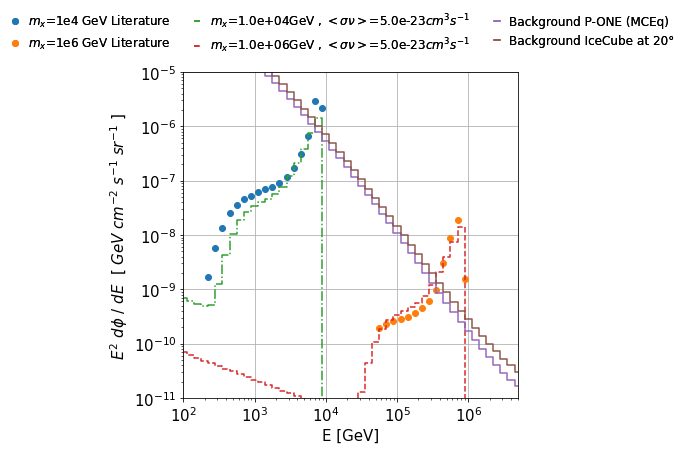

In [16]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#plt.title('Scaling Correction %.1e' % (scaling))
#ax1.step(pdm._shower_sim._egrid, dphi_2(pdm._shower_sim._egrid),'o', label=r'$m_{x}$ = 1e2 GeV Lit')
ax1.step(pdm._shower_sim._egrid, dphi_4(pdm._shower_sim._egrid),'o', label=r'$m_{x}$=1e4 GeV Literature')
ax1.step(pdm._shower_sim._egrid, dphi_6(pdm._shower_sim._egrid), 'o',label=r'$m_{x}$=1e6 GeV Literature')
#ax1.step(pdm._shower_sim.egrid, (pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid,mass_grid[0],sv)) * pdm._shower_sim.egrid**2.,'-.',
#         label=r'$m_{x}$ = %.1e , $<\sigma\nu>$ = %.1eGeV Sim'%(mass_grid[0],sv))
ax1.step(pdm._shower_sim.egrid, (pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid,mass_grid[4],sv)) * pdm._shower_sim.egrid**2.,'-.',
         label=r'$m_{x}$=%.1eGeV , $<\sigma\nu>$=%.1e$cm^{3}s^{-1}$'%(mass_grid[4],sv))
ax1.step(pdm._shower_sim.egrid, (pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid,mass_grid[-1],sv))* pdm._shower_sim.egrid**2.,'--',
         label=r'$m_{x}$=%.1eGeV , $<\sigma\nu>$=%.1e$cm^{3}s^{-1}$'%(mass_grid[-1],sv))
ax1.step(pdm._shower_sim.egrid, shower_po*pdm._shower_sim.egrid**2, label='Background P-ONE (MCEq)') # Karlsruhe Corsika
ax1.step(pdm._shower_sim.egrid, shower_ice*pdm._shower_sim.egrid**2, label='Background IceCube at 20°')

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('E [GeV]', fontsize=fontsize)
ax1.set_ylabel(r'$E^2$ $d\phi$ / $dE$  [ $GeV$ $cm^{-2}$ $s^{-1}$ $sr^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(1e2, 0.5e7)
ax1.set_ylim(1e-11,1e-5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.5, +1.12),
                 ncol=3, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()

In [17]:
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12/data/background_ice.pkl','rb'))

In [18]:
pdm._signal_data['numu'].shape

(9, 9, 91)

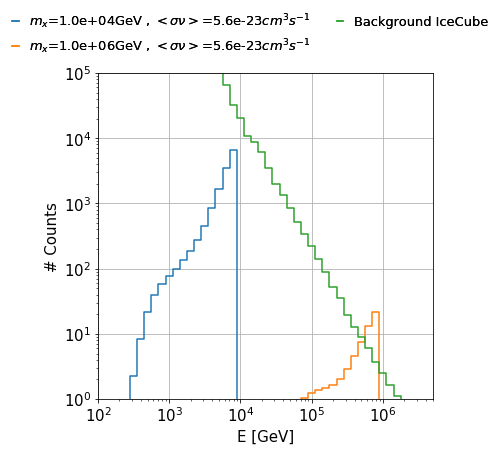

In [19]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#plt.title('Scaling Correction %.1e' % (scaling))
#ax1.step(pdm._shower_sim._egrid, dphi_2(pdm._shower_sim._egrid),'o', label=r'$m_{x}$ = 1e2 GeV Lit')

#ax1.step(pdm._shower_sim.egrid[-len(pdm._signal_data['numu'][4][4]):], pdm._signal_data['numu'][5][2],'-.',
#         label=r'$m_{x}$=%.1eGeV , $<\sigma\nu>$=%.1e$cm^{3}s^{-1}$'%(mass_grid[5],sv_grid[2]))
ax1.step(pdm._shower_sim.egrid[-len(pdm._signal_data['numu'][4][4]):], pdm._signal_data['numu'][6][4],'-',
         label=r'$m_{x}$=%.1eGeV , $<\sigma\nu>$=%.1e$cm^{3}s^{-1}$'%(mass_grid[4],sv_grid[6]))
ax1.step(pdm._shower_sim.egrid[-len(pdm._signal_data['numu'][4][4]):], pdm._signal_data['numu'][6][-1],'-',
         label=r'$m_{x}$=%.1eGeV , $<\sigma\nu>$=%.1e$cm^{3}s^{-1}$'%(mass_grid[-1],sv_grid[6]))
#ax1.step(pdm._shower_sim.egrid, shower_po*pdm._shower_sim.egrid**2, label='Background P-ONE (MCEq)') # Karlsruhe Corsika
#ax1.step(pdm._shower_sim.egrid, shower_ice*pdm._shower_sim.egrid**2, label='Background IceCube at 20°')
ax1.step(pdm._shower_sim._egrid, np.sum(background_ic['numu'],axis=0),'-', label='Background IceCube')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel('E [GeV]', fontsize=fontsize)
ax1.set_ylabel(r'# Counts', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(1e2, 0.5e7)
ax1.set_ylim(1e0,1e5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.2, +1.12),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()

In [20]:
ratio = pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid, mass_grid[mass_id], sv_grid[sv_id]) / (shower_po) 

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:279: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:280: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd


In [21]:
pickle.dump(pdm.signal, open('../data/PONE_signal_counts.pkl',"wb"))

In [22]:
flux={}
flux[15]={}
flux[85]={}
flux[120]={}
flux[15]['numu'] = (dphi_4(pdm._shower_sim.egrid)) * pdm._shower_sim._egrid**(-2)
flux[85]['numu'] = flux[15]['numu']
flux[120]['numu'] = flux[15]['numu']
flux[15]['nue']=flux[85]['nue']=flux[120]['nue']=flux[15]['nutau']=flux[85]['nutau']=flux[120]['nutau']=flux[15]['numu']
_lit=pdm._Detector.sim2dec(flux,True)["numu"]


In [23]:
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
angle_grid = np.logspace(0,90,91)

In [24]:
signal_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/limits_signal_IceCube.pkl','rb'))


In [25]:
# Loading comparison data
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])
limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/13_12/data/limits_results_IceCube.pkl','rb'))
limits_1e2 = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12/data/limits_results_IceCube.pkl','rb'))
cl_lit_ice = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))

In [26]:
ratio_c = (pdm._signal.signal_calc(pdm._shower_sim.egrid,mass_grid[mass_id],sv_grid[sv_id])[0] /       
            pdm._limit_calc._bkgrd['numu'])

<ipython-input-26-dfd4184839cc>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_c = (pdm._signal.signal_calc(pdm._shower_sim.egrid,mass_grid[mass_id],sv_grid[sv_id])[0] /


In [27]:
ratio_c

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 1.53939466e-05,
       1.72826396e-05, 1.94508517e-05, 2.19685775e-05, 2.49191659e-05,
       2.83750249e-05, 3.24193663e-05, 3.72467032e-05, 4.31867143e-05,
       5.90600376e-05, 1.91608720e-04, 8.63405869e-04, 2.76953286e-03,
       6.38533174e-03, 1.20066993e-02, 2.01649242e-02, 3.23856210e-02,
       5.20279360e-02, 8.73499951e-02, 1.60002556e-01, 3.47368212e-01,
       8.43116517e-01, 2.20596945e+00, 6.19209693e+00, 1.58586731e+01,
      

Text(0, 0.5, 'Ratio')

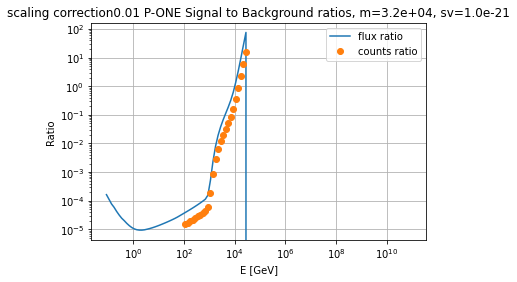

In [28]:
plt.title('scaling correction'+str(config['advanced']['scaling correction'])+' P-ONE Signal to Background ratios, m=%.1e, sv=%.1e'%(mass_grid[mass_id],sv_grid[sv_id]))
plt.loglog(pdm._shower_sim.egrid,ratio,label='flux ratio') 
plt.loglog(pdm._shower_sim.egrid,ratio_c,'o',label='counts ratio')
plt.legend()
plt.grid()
plt.xlabel('E [GeV]')
plt.ylabel('Ratio')

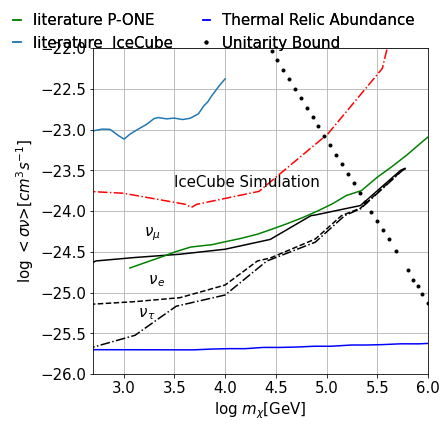

In [29]:
color = ['black', 'orange', 'purple']
ll = ['-', '--', '-.']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)  # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    
    # ---------------------------------------------
    # Plotting
    #plt.title('P-ONE Limits Results',fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    ax1.contour(pdm.results[i], levels = [0.9], colors=color[j],  linestyles=ll[j],
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    break
ax1.contour(limits["numu"], levels=[0.9], colors='red',origin='lower',linestyles='-.',
                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nue"], levels = [0.9], colors='black', linestyles='--',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), 
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nutau"], levels = [0.9], colors='black', linestyles='-.',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))



#                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
#                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))), legend='IceCube')
##ax1.contour(test_chi2[i], levels = [0.9], colors='blue',
#            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
#                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
#pos = ax1.imshow(pdm.results[i], extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
#                                          min(np.log10(sv_grid)), max(np.log10(sv_grid))),
#                 origin='lower', aspect='auto',cmap = plt.cm)
#figure.colorbar(pos, ax=ax1)
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature P-ONE')
ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),label='literature  IceCube')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='Thermal Relic Abundance')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
         label='Unitarity Bound')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log$ $m_{\chi}$[GeV]", fontsize=fontsize)
ax1.set_ylabel(r"$\log$ $<\sigma \nu$>[$cm^{3} s^{-1}$]", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(2.7, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -22)
ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)
#ax1.text(5, -25.2, "IceCube 1e-2", fontsize=fontsize-5)
#ax1.text(3.4, -24.4, "P-ONE", fontsize=fontsize)
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)
#ax1.text(3, -23.5, r"$\nu_\mu$ 1e-3", fontsize=fontsize-5)
#ax1.text(3.2, -25, r"$\nu_e$", fontsize=fontsize)
#ax1.text(3.7, -25.8, r"$\nu_\tau$", fontsize=fontsize)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.0, +1.05),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Limits_Example_all"+".png",
               bbox_inches='tight', dpi=export_dpi)


<ipython-input-30-3c1fd0107ee7>:18: UserWarning: The following kwargs were not used by contour: 'legend'
  ax1.contour(limits["numu"], levels=[0.9], colors='red',origin='lower',


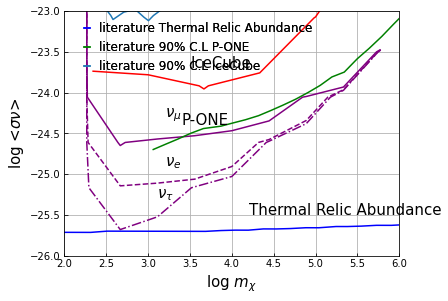

In [30]:
# All Limits-------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(pdm.results["numu"], levels = [0.9], colors='purple', linestyles='-',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nue"], levels = [0.9], colors='purple', linestyles='--',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), 
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nutau"], levels = [0.9], colors='purple', linestyles='-.',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='literature Thermal Relic Abundance')
ax1.contour(limits["numu"], levels=[0.9], colors='red',origin='lower',
                                extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))), legend='IceCube')
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L P-ONE')
ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]), label='literature 90% C.L IceCube')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"log $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"log <$\sigma\nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)),-23.0)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
ax1.text(3.5, -23.7, "IceCube", fontsize=fontsize)
ax1.text(3.4, -24.4, "P-ONE", fontsize=fontsize)
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r"$\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r"$\nu_\tau$", fontsize=fontsize)
ax1.text(4.2, -25.5, "Thermal Relic Abundance", fontsize=fontsize)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "All_Limits.png",
               bbox_inches='tight', dpi=export_dpi)

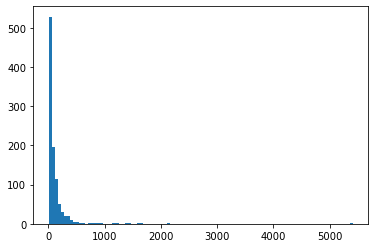

In [31]:
samples = np.random.lognormal(4, 0.3 * 4., 1000)
count, bins, ignored = plt.hist(samples, 100, density=False, align='mid')

In [32]:
mid_e_grid = np.logspace(3, 4, 100)

In [101]:
spl_mid_mean = UnivariateSpline([1e3, 1e4], [700., 1e4], k=1)
spl_mid_sigma = UnivariateSpline([1e3, 1e4], [0.45, 0.35], k=1)

In [102]:
def local_log_normal(x, mu, sigma):
    """Distribution function 
    x = E_grid
    mu = log(E) 
    sigma = fraction of E  ( so no fraction or percentage ) ( standard deviation as per definition )
    """
    sigma = ( sigma  )
    pdf = np.exp(-( np.log(x) - mu )**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi))

    return pdf

In [103]:
def distro_parms(Etrue):
    """ Parameter estimation function depending  on the E_true
    [mu] = [log(E/GeV)]
    sigma = fraction of E 
    """
    if Etrue < 1e3:
        mu = np.log(700)
        sigma = 0.45 
    elif 1e3 <= Etrue <= 1e4:
        mu = np.log(spl_mid_mean(Etrue))
        sigma = spl_mid_sigma(Etrue) 
    else:
        mu = np.log(Etrue)
        sigma = 0.35 
    return mu, sigma


#def smearing(Etrue, number_of_events, sampling_grid=hist_grid):
#    mu, sigma = distro_parms(Etrue)
#    return (
#        np.nan_to_num(local_log_normal(sampling_grid, mu, sigma)) *
#        number_of_events
#    )


In [104]:
samples_fun = []
samples = []
for i,E in enumerate(pdm._shower_sim.egrid):
    mu, sigma = distro_parms(E)
    samples.append(np.random.lognormal((mu), sigma, len(e_grid))) # Axis0 = E, meaning the axis0 elements are the E_ture for which axis1 correspondece as distribution !!! Thats why transpose for imshow
    samples_fun.append(np.nan_to_num(local_log_normal(e_grid, mu, sigma)))

In [111]:
samples[0]

array([ 834.41959688, 1086.5557974 , 1020.8156147 , 1216.04664106,
       1054.95899468,  699.66523104, 2255.821666  ,  394.21242508,
        739.39912914,  637.47704758,  815.99495402,  753.66243803,
       1007.70934062,  676.40927993,  661.16410328, 1663.90497422,
        629.54746972,  697.30579897,  517.49832048,  957.52324621,
        663.96262698,  484.92847482,  479.97951753,  540.61564054,
        933.98294894,  666.34638443,  609.98153287,  511.10885388,
        552.73911598,  825.03487049, 1548.61848887,  440.14018509,
        706.32435346,  767.23560578,  410.60257985,  581.58730247,
        675.46229475,  725.61067647,  546.76649135,  853.17326924,
        589.97082137, 1107.53582541,  674.14786139,  491.73260055,
        492.26823535,  667.41816097,  949.01477504, 1328.26136653,
       1679.73704944, 1074.15478707,  784.76580747,  513.18587323,
        598.95731825,  804.67611817,  745.90211732,  412.80879534,
        502.20412723,  665.37512137,  622.40929374,  870.38311

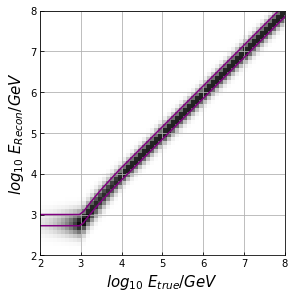

In [105]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
z_p=ax1.imshow((np.array(samples_fun).T)*e_grid, origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ), cmap=plt.get_cmap('binary'))
#figure.colorbar(z_p, ax=(ax1))
ax1.contour(np.array(samples_fun*e_grid).T, levels = [0.68], colors='purple', linestyles='-',
            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )
#ax1.contour((samples_fun*e_grid).T, levels = [1.2], colors='purple', linestyles='-',
#            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )


ax1.set_xlabel(r"$log_{10}$ $E_{true} / GeV$", fontsize=fontsize)
ax1.set_ylabel(r"$log_{10}$ $E_{Recon} / GeV$", fontsize=fontsize)
#ax1.set_ylabel(r"Distribution fraction", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(2,8)
ax1.set_ylim(2,8)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.grid()

In [106]:
for i,_ in enumerate(e_grid):
    print(np.trapz(samples_fun[i], x=e_grid))

1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.0088599515463972
1.0088599515463972
1.008859951546397
1.008859951546397
1.008859951546397
1.008859951546397
1.0088599515463965
1.0088599515463967
1.0088599515463967
1.008859951546397
1.008

ValueError: operands could not be broadcast together with shapes (0,) (121,) 

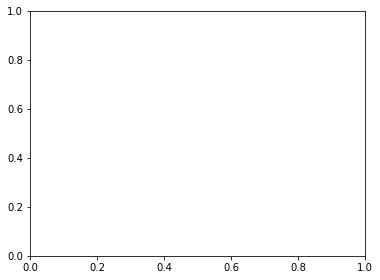

In [107]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
ax1.imshow((count_np*e_grid).T, origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ))
ax1.set_xlabel(r"log $E_{true}$", fontsize=fontsize)
ax1.set_ylabel(r"log $E_{Recon}$", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')

# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.grid()

In [ ]:
np.array(count_np).shape

(121, 121)

In [ ]:
count_np

[array([0.0011605, 0.       , 0.0011605, 0.       , 0.       , 0.0011605,
        0.       , 0.0011605, 0.0011605, 0.0011605, 0.       , 0.002321 ,
        0.       , 0.0011605, 0.       , 0.0034815, 0.0011605, 0.       ,
        0.0011605, 0.004642 , 0.002321 , 0.0011605, 0.       , 0.0011605,
        0.0034815, 0.002321 , 0.0011605, 0.0011605, 0.0034815, 0.       ,
        0.004642 , 0.004642 , 0.002321 , 0.0058025, 0.       , 0.0058025,
        0.002321 , 0.0011605, 0.0011605, 0.0034815, 0.002321 , 0.0034815,
        0.004642 , 0.0034815, 0.0011605, 0.0011605, 0.0011605, 0.0011605,
        0.002321 , 0.0011605, 0.0011605, 0.0011605, 0.0011605, 0.0034815,
        0.       , 0.       , 0.004642 , 0.0034815, 0.       , 0.002321 ,
        0.0034815, 0.       , 0.0011605, 0.       , 0.       , 0.0011605,
        0.       , 0.       , 0.0011605, 0.0011605, 0.0034815, 0.002321 ,
        0.0011605, 0.0011605, 0.       , 0.       , 0.0011605, 0.0011605,
        0.       , 0.       , 0.001160